In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

data = pd.read_csv("./유방암.CSV",engine="python")
print(data.isnull())
print(data.isnull().sum())

     diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0        False        False         False           False      False   
1        False        False         False           False      False   
2        False        False         False           False      False   
3        False        False         False           False      False   
4        False        False         False           False      False   
5        False        False         False           False      False   
6        False        False         False           False      False   
7        False        False         False           False      False   
8        False        False         False           False      False   
9        False        False         False           False      False   
10       False        False         False           False      False   
11       False        False         False           False      False   
12       False        False         False           False      F

# 1. 데이터 정보 확인
기본적인 Data 정보와 Type을 확인했다.<br>
좀더 쉽게보기 위해 isnull().sum()을 불러와 확인했다.<br>
확인을해보니 모든 항목이 False여서 결측치가 없다고 판단했다.<br>
diagnosis (M = malignant or B = benign)을 제외하고 float64 type이다.

In [2]:
print("\n \t The Data Frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
data.info()
data.head(3)
print(data.isnull().sum())


 	 The Data Frame has 569 rows and 31 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 

# 1-1 범주형 변수인 diagnosis를 제외했다.
# describe()를 사용해서 통계량을 산출했다.

In [3]:
#data.drop(data.columns[[-1,0]],axis=1,inplace=True)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 no

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 1-2 569개의 질병 데이터 분석

In [4]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())
print("\n \t diagonsis 데이터 - {}, 양성 - {} 악성 - {}".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 diagonsis 데이터 - 569, 양성 - 357 악성 - 212


# 2. 데이터 시각화
2.1 Target Distribution

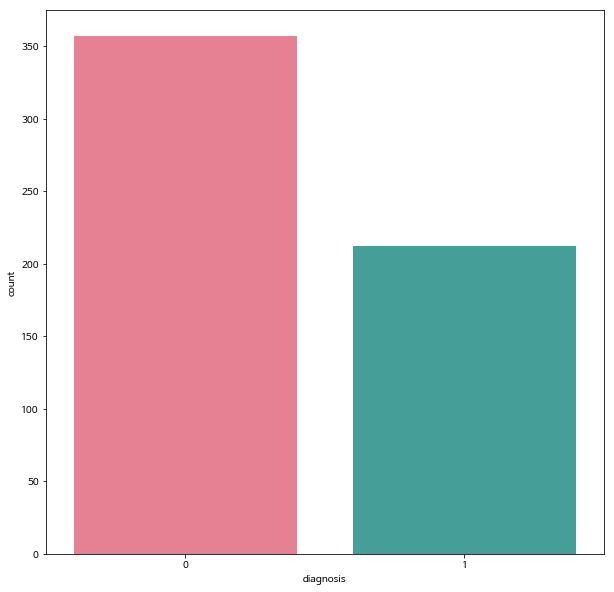

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(data['diagnosis'],  palette = "husl")

# 2.2 QQplot
사용하는 이유 - 두 Data Set이 같은 분포로부터 왔는지를 보이는 것.
실용적으로 많은 데이터셋이 가우시안 분포와 비교된다고 하는데, **보통은 두 개의 분포가 없이 그냥 한 분포를 R에서 qqnorm함수를 사용해 얼마나 가우시안 분포와 비슷한지 알 수 있다. 하지만 기본적으로 Q-Q plot은 가우시안 뿐만 아니라, 어떤 분포든 두 분포의 유사성을 보는 것으로, 두 분포가 포아송 분포라면 이것 역시 선으로 나타난다.**

2.2.1 - QQplot을 통해 Features distribution를 먼저 살펴본다. <br>
2.2.2 - 각 그래프의 실제 분포는 이론적 분포에 가깝다. <br>
그러나 일부 그래프는 은 형상의 이론적 분포에서 큰 편차를 갖는것을 확인했다.

Text(0.5, 0.98, 'Features distribution')

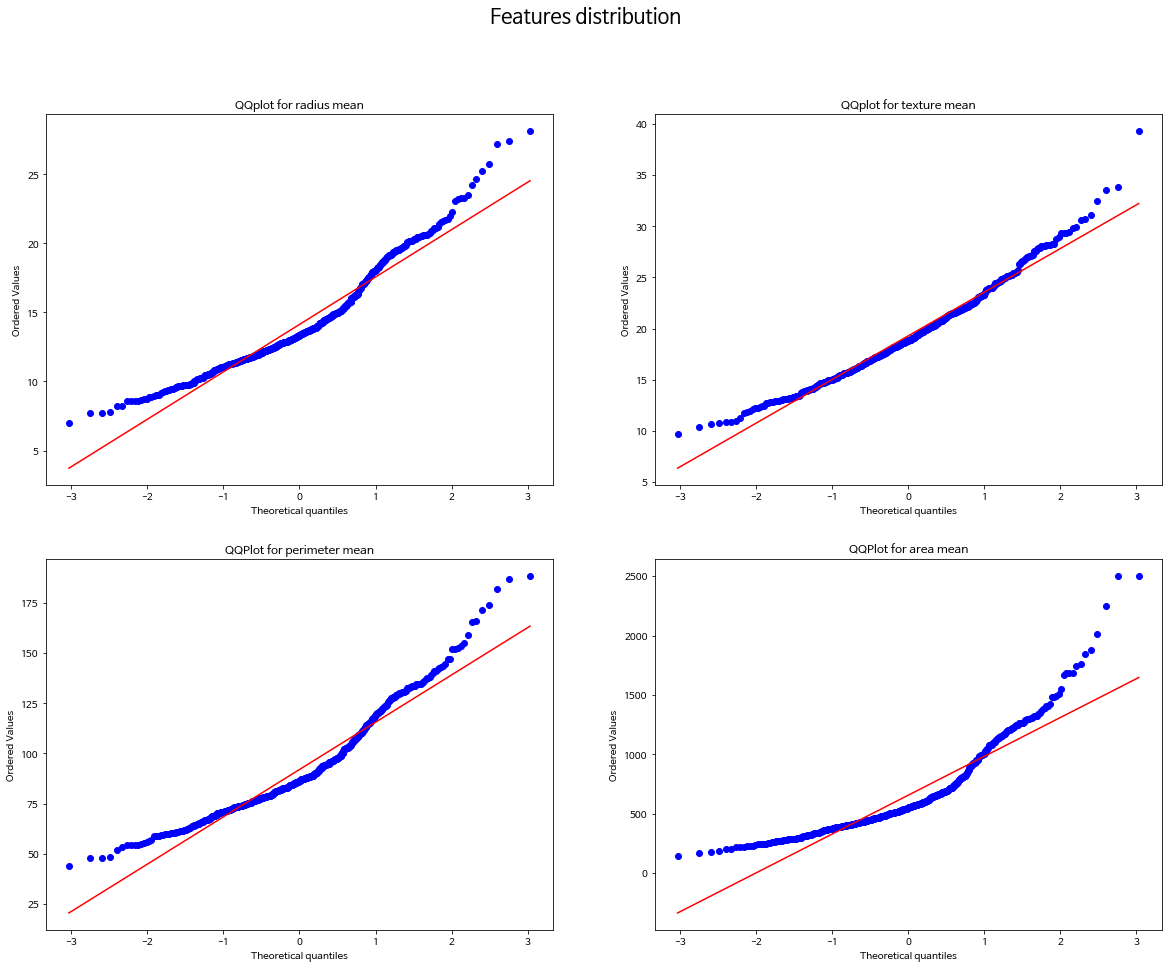

In [6]:
fig = plt.figure(figsize = (20,15))
plt.subplot(221)
stats.probplot(data['mean radius'], dist = 'norm', plot = plt)
plt.title('QQplot for radius mean')
plt.subplot(222)
stats.probplot(data['mean texture'],dist='norm', plot=plt)
plt.title('QQplot for texture mean')
plt.subplot(223)
stats.probplot(data['mean perimeter'], dist='norm', plot=plt)
plt.title('QQPlot for perimeter mean')
plt.subplot(224)
stats.probplot(data['mean area'],dist='norm',plot=plt)
plt.title('QQPlot for area mean')
fig.suptitle('Features distribution', fontsize = 20)

#plt.figure(figsize=(15,8))
#stats.probplot(data['mean smoothness'], dist = 'norm', plot = plt)
#plt.title('QQPlot for smoothness mean')
#plt.show()
#stats.probplot(data['mean compactness'], dist = 'norm', plot = plt)
#plt.title('QQPlot for compactness mean')
#plt.show()
#stats.probplot(data['mean concavity'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concavity mean')
#plt.show()
#stats.probplot(data['mean concave points'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concave points mean')
#plt.show()
#stats.probplot(data['mean fractal dimension'], dist = 'norm', plot = plt)
#plt.title('QQPlot for fractal dimension mean')
#plt.show()
#stats.probplot(data['radius error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for radius se')
#plt.show()
#stats.probplot(data['texture error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for texture se')
#plt.show()
#stats.probplot(data['perimeter error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for perimeter se')
#plt.show()
#stats.probplot(data['area error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concave area se')
#plt.show()
#stats.probplot(data['smoothness error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for smoothness se')
#plt.show()
#stats.probplot(data['compactness error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for compactness se')
#plt.show()
#stats.probplot(data['concavity error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concavity se')
#plt.show()
#stats.probplot(data['concave points error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concave points se')
#plt.show()
#stats.probplot(data['symmetry error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concave symmetry se')
#plt.show()
#stats.probplot(data['fractal dimension error'], dist = 'norm', plot = plt)
#plt.title('QQPlot for fractal dimension se')
#plt.show()
#stats.probplot(data['worst radius'], dist = 'norm', plot = plt)
#plt.title('QQPlot for radius worst')
#plt.show()
#stats.probplot(data['worst texture'], dist = 'norm', plot = plt)
#plt.title('QQPlot for texture worst')
#plt.show()
#stats.probplot(data['worst perimeter'], dist = 'norm', plot = plt)
#plt.title('QQPlot for perimeter worst')
#plt.show()
#stats.probplot(data['worst area'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concave area worst')
#plt.show()
#stats.probplot(data['worst smoothness'], dist = 'norm', plot = plt)
#plt.title('QQPlot for smoothness worst')
#plt.show()
#stats.probplot(data['worst compactness'], dist = 'norm', plot = plt)
#plt.title('QQPlot for compactness worst')
#plt.show()
#stats.probplot(data['worst concavity'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concavity worst')
#plt.show()
#stats.probplot(data['worst concave points'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concave points worst')
#plt.show()
#stats.probplot(data['worst symmetry'], dist = 'norm', plot = plt)
#plt.title('QQPlot for concave symmetry worst')
#plt.show()
#stats.probplot(data['worst fractal dimension'], dist = 'norm', plot = plt)
#plt.title('QQPlot for fractal dimension worst')
#plt.show()

# 2.3 BoxPlot - 악성과 양성의 차이있는 정보
**사용하는 이유 - 많은 데이터를 눈으로 확인하기 어려울 때 그림을 이용해 데이터 집합의 범위와 중앙값을 빠르게 확인할 수 있는 목적으로 사용한다. 또한 통계적으로 이상치(outlier)가 있는지도 확인이 가능하다.**<br>
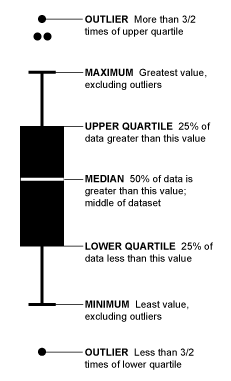
    1. 최솟값 : 제 1사분위에서 1.5 IQR을 뺀 위치
    2. 제 1사분위(Q1) : 25%의 위치를 의미
    3. 제 2사분위(Q2) : 50%의 위치로 중앙값(median)을 의미
    4. 제 3사분위(Q3) : 75%의 위치를 의미
    5. 최댓값 : 제 3사분위에서 1.5 IQR을 더한 위치
    6. 이상치 : 최솟값과 최대값을 넘어가는 위치에 있는 값

2.3.1 - Boxplot을 사용해 distribution과 outliers들의 정보를 찾는데 사용할 수 있다.<br>
2.3.2 - 아래 6개 plot을 보면 악성과 양성간에 큰 차이가 있다는 것을 확인할 수 있다.<br>


Text(0.5, 0.98, 'Features boxplots to compare malignant and benign')

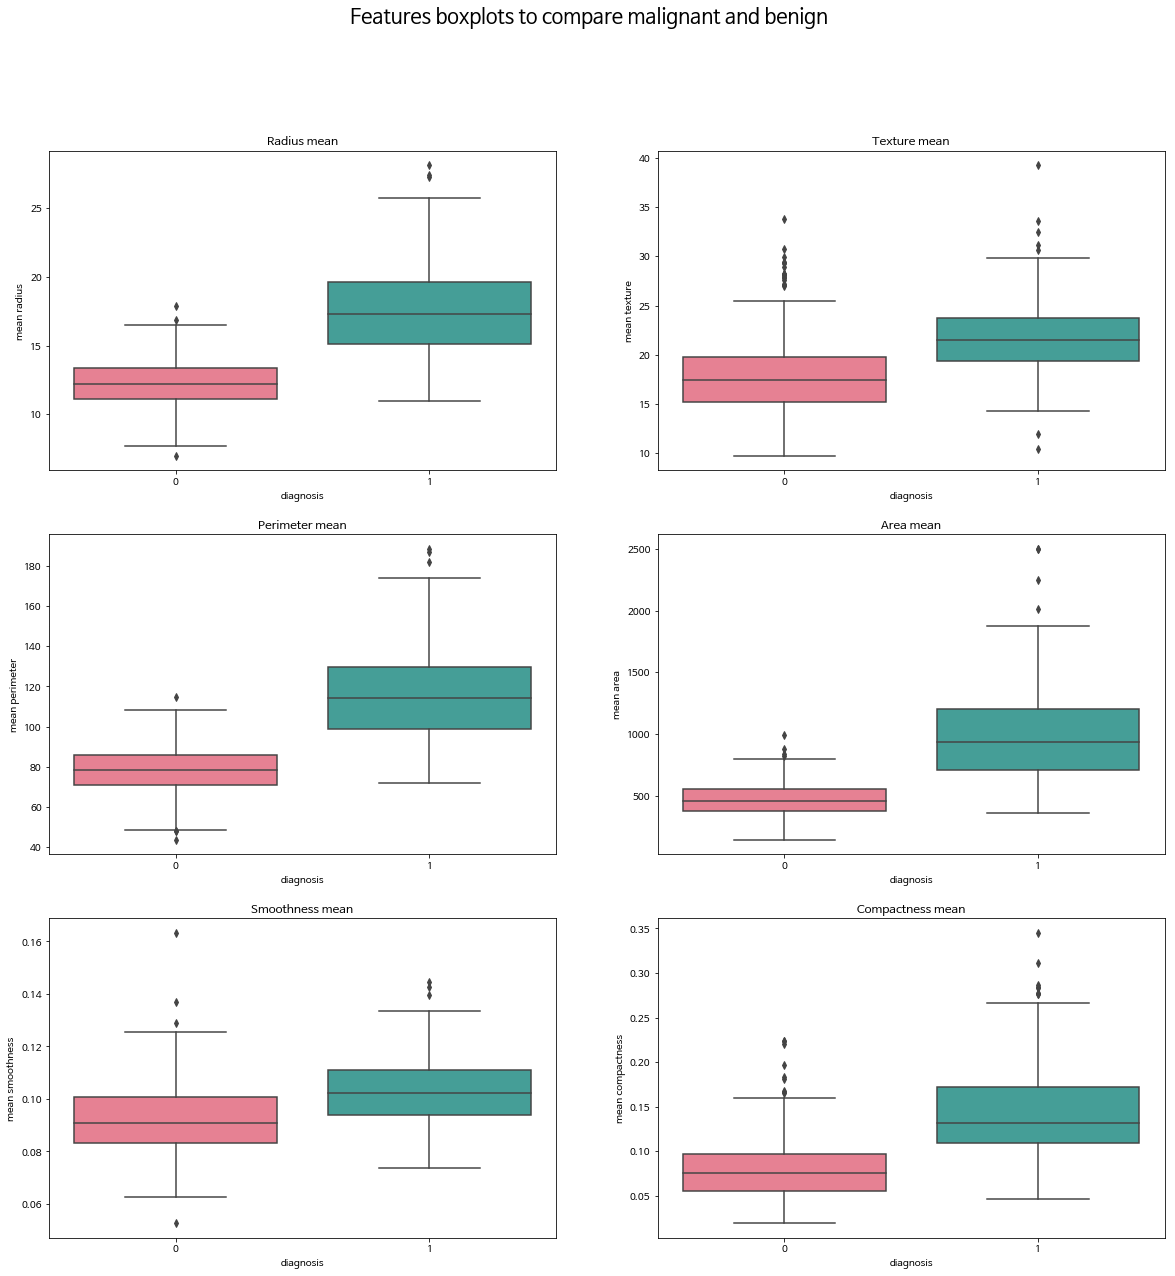

In [7]:
fig = plt.figure(figsize = (20,20))
plt.subplot(321)
sns.boxplot(x=data['diagnosis'], y = data['mean radius'],palette = 'husl')
plt.title('Radius mean')
plt.subplot(322)
sns.boxplot(x=data['diagnosis'], y = data['mean texture'],palette = 'husl')
plt.title('Texture mean')
plt.subplot(323)
sns.boxplot(x=data['diagnosis'], y=data['mean perimeter'],palette ='husl')
plt.title('Perimeter mean')
plt.subplot(324)
sns.boxplot(x=data['diagnosis'],y=data['mean area'],palette='husl')
plt.title('Area mean')
plt.subplot(325)
sns.boxplot(x = data['diagnosis'],y=data['mean smoothness'],palette='husl')
plt.title('Smoothness mean')
plt.subplot(326)
sns.boxplot(x = data['diagnosis'], y = data['mean compactness'], palette = "husl")
plt.title('Compactness mean')
fig.suptitle('Features boxplots to compare malignant and benign', fontsize = 20)

# 2.3 BoxPlot - 악성과 양성의 차이없는 정보
2.3.1 - "mean fractal dimension" , "texture error", "smoothness error", "symmetry error", 'worst fractal dimension"의 variable로 boxplot을 비교한 결과 악성과 양성의 distribution은 거의 같은 것을 확인했다.<br>
2.3.2 - **이러한 variable 정보들은 진단에 영향을 미치지 않는 다고 추측할 수 있다.**

Text(0.5, 0.98, 'Features boxplots to compare malignant and benign')

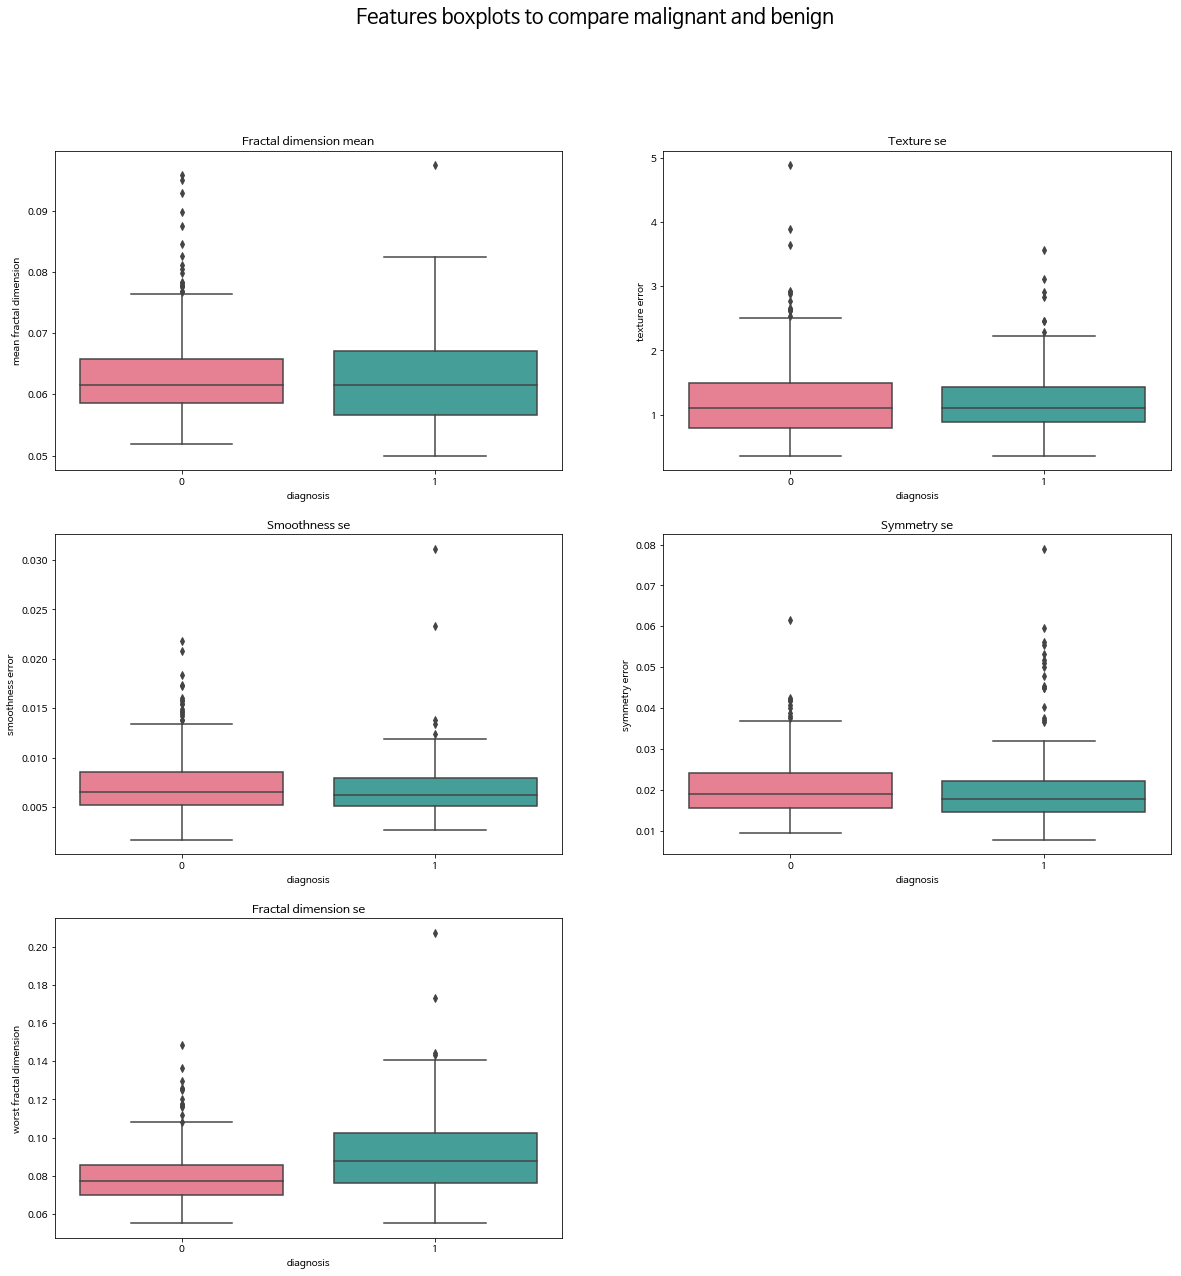

In [8]:
fig = plt.figure(figsize = (20, 20))
plt.subplot(321)
sns.boxplot(x = data['diagnosis'], y = data['mean fractal dimension'], palette = "husl")
plt.title('Fractal dimension mean')
plt.subplot(322)
sns.boxplot(x = data['diagnosis'], y = data['texture error'], palette = "husl")
plt.title('Texture se')
plt.subplot(323)
sns.boxplot(x = data['diagnosis'], y = data['smoothness error'], palette = "husl")
plt.title('Smoothness se')
plt.subplot(324)
sns.boxplot(x = data['diagnosis'], y = data['symmetry error'], palette = "husl")
plt.title('Symmetry se')
plt.subplot(325)
sns.boxplot(x = data['diagnosis'], y = data['worst fractal dimension'], palette = "husl")
plt.title('Fractal dimension se')
fig.suptitle('Features boxplots to compare malignant and benign', fontsize = 20)

# 2.4 Statistical analysis
# Boxplot에서 추출한 정보가 유의미한지 판별
2.3.3 - 양성과 악성의 데이터로 나눈다<br>
2.3.4 - 두 데이터를 비교하기 위해 t-test를 사용한다.<br>
2.3.5 - p-value > 0.05 수준에서 비교한다.

In [9]:
df0 = data[data['diagnosis'] ==  0]
df1 = data[data['diagnosis'] ==  1]
df0.drop('diagnosis' , axis = 1, inplace = True)
df1.drop('diagnosis' , axis = 1, inplace = True)

C:\Users\admin1\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# p-value가 0.05보다 크다. 따라서 이러한 특징들이 dignosis에 영향을 미치지 않는 것을 확인했다.

In [10]:
feature = []
t_value = []
p_value = []
for column in df0.columns:
    ttest = stats.ttest_ind(df0[column], df1[column])
    feature.append(column)
    t_value.append(ttest[0])
    p_value.append(ttest[1])
ttest_data = {'feature' : feature, 't_value' : t_value, 'p_value' : p_value}
ttest_df = pd.DataFrame(ttest_data)
ttest_df.loc[ttest_df['p_value'] > 0.05]

,feature,t_value,p_value
9,mean fractal dimension,0.305711,0.759937
11,texture error,0.197724,0.843332
14,smoothness error,1.599365,0.110297
18,symmetry error,0.155298,0.876642
19,fractal dimension error,-1.862330,0.063074


# 2.4 Correlation
# Heatmap 생성 - feature간의 상관관계
2.4.1 - Heatmap을 통해 변수와 변수간의 correlation 확인

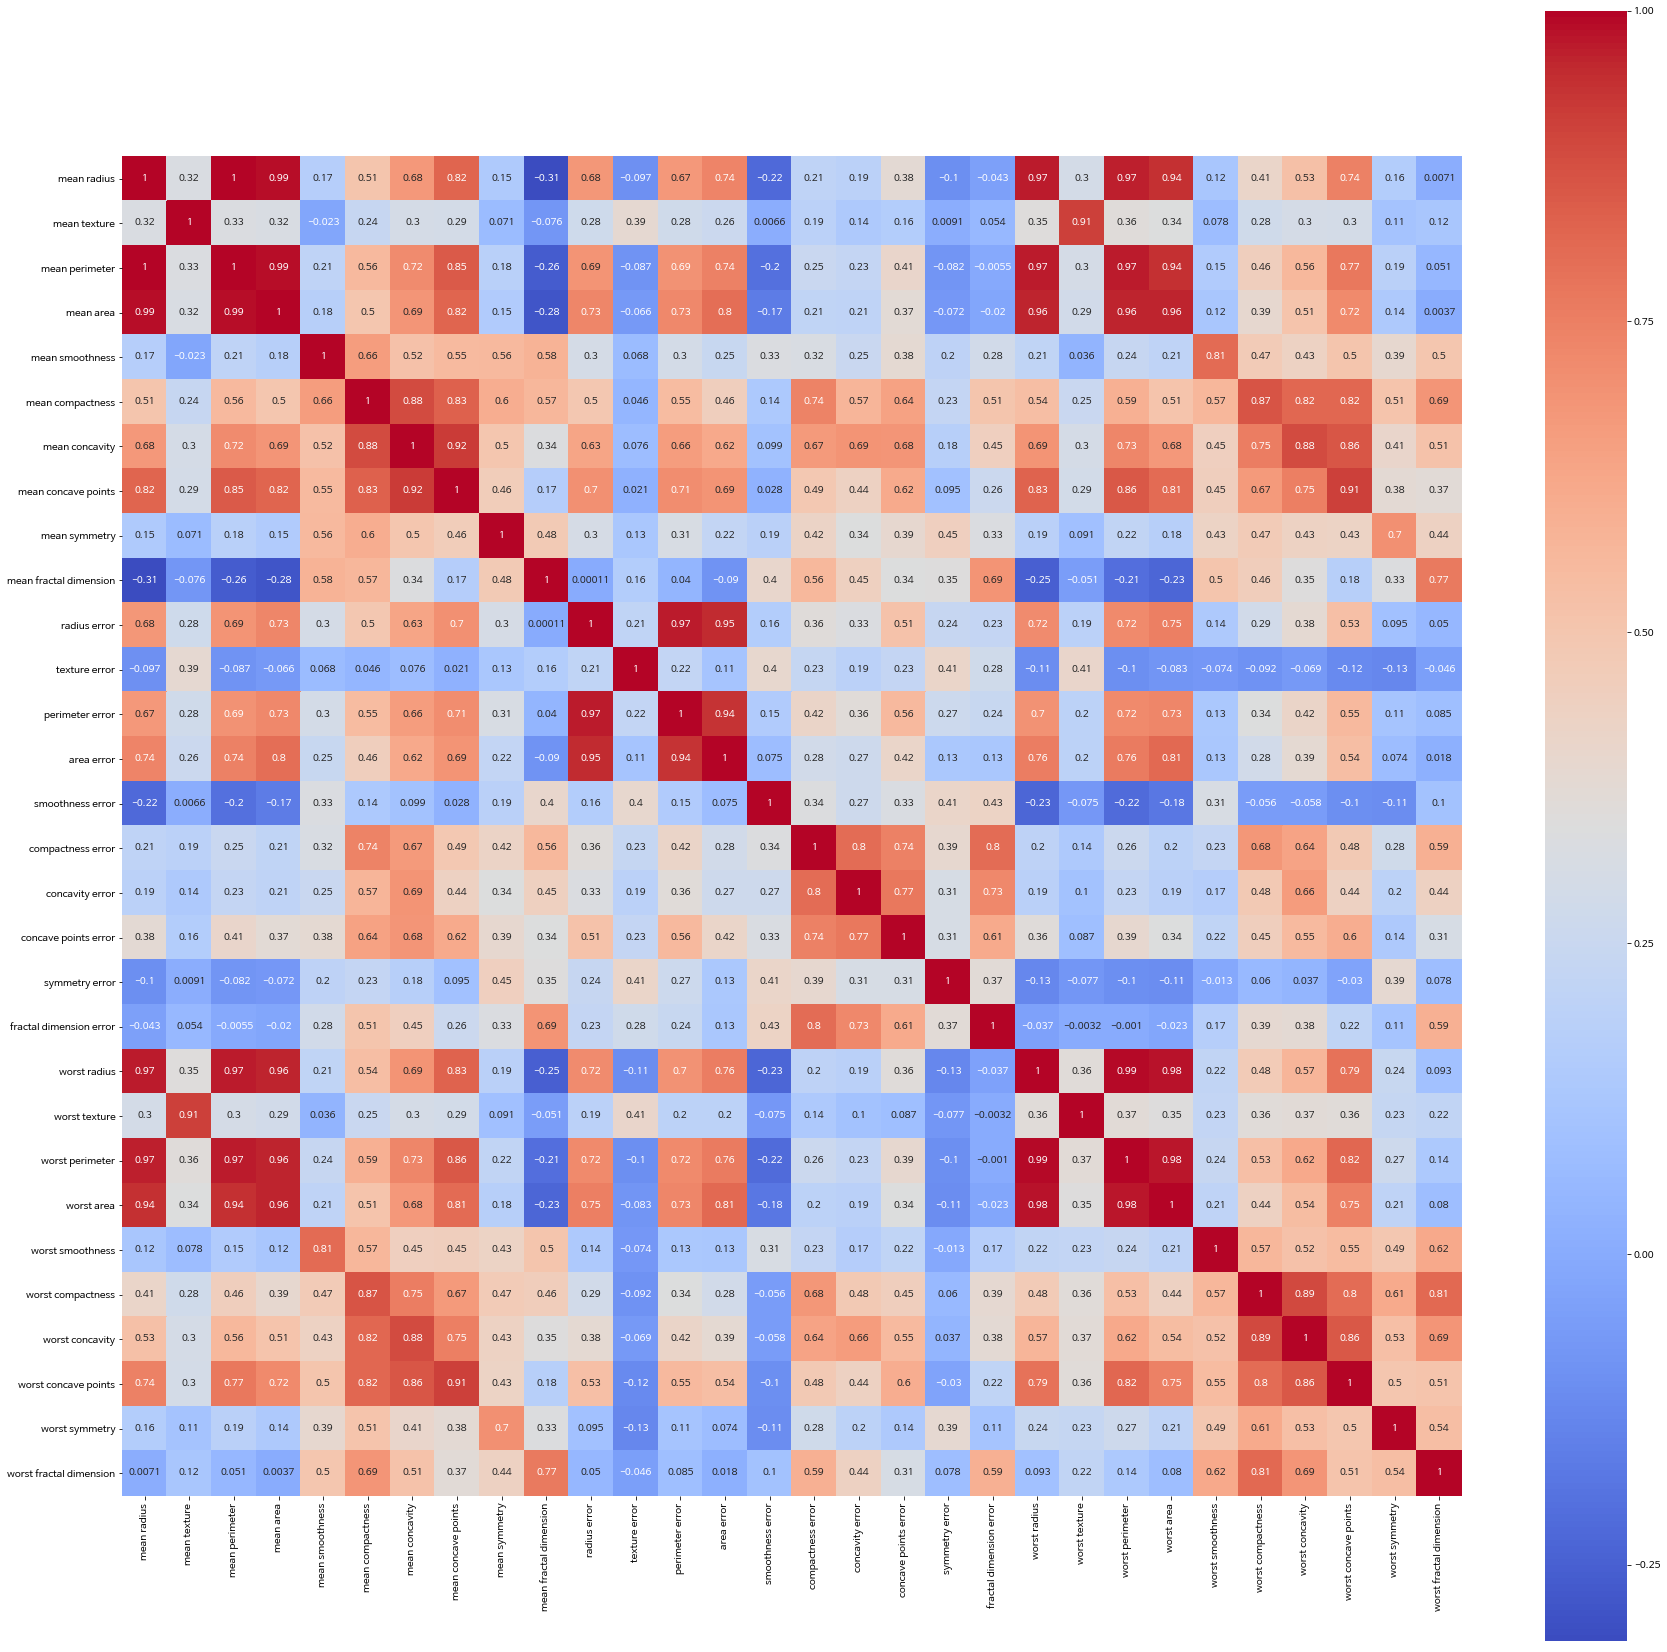

In [11]:
features_mean= list(data.columns[1:])
plt.figure(figsize=(30,30))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

# 2.4.1 Correlation - Scatter plot
# 3가지 구간으로 scatter plot 비교
# 2.4.1.1 correlation > 0.9 구간의 features 확인
mean perimeter - mean radius<br>
mean area - mean radius<br>
mean radius - worst radius<br>
mean area - mean perimeter<br>
area error - perimeter error<br>
mean perimeter - worst radius<br>
**다음과 같은 variable간에 correlation이 0.9 이상이 나타났다.<br>
또한 그래프를 살펴보면 linear형태로 그래프가 그려지는 것을 확인**

Text(0.5, 0.98, 'Correlation > 0.9')

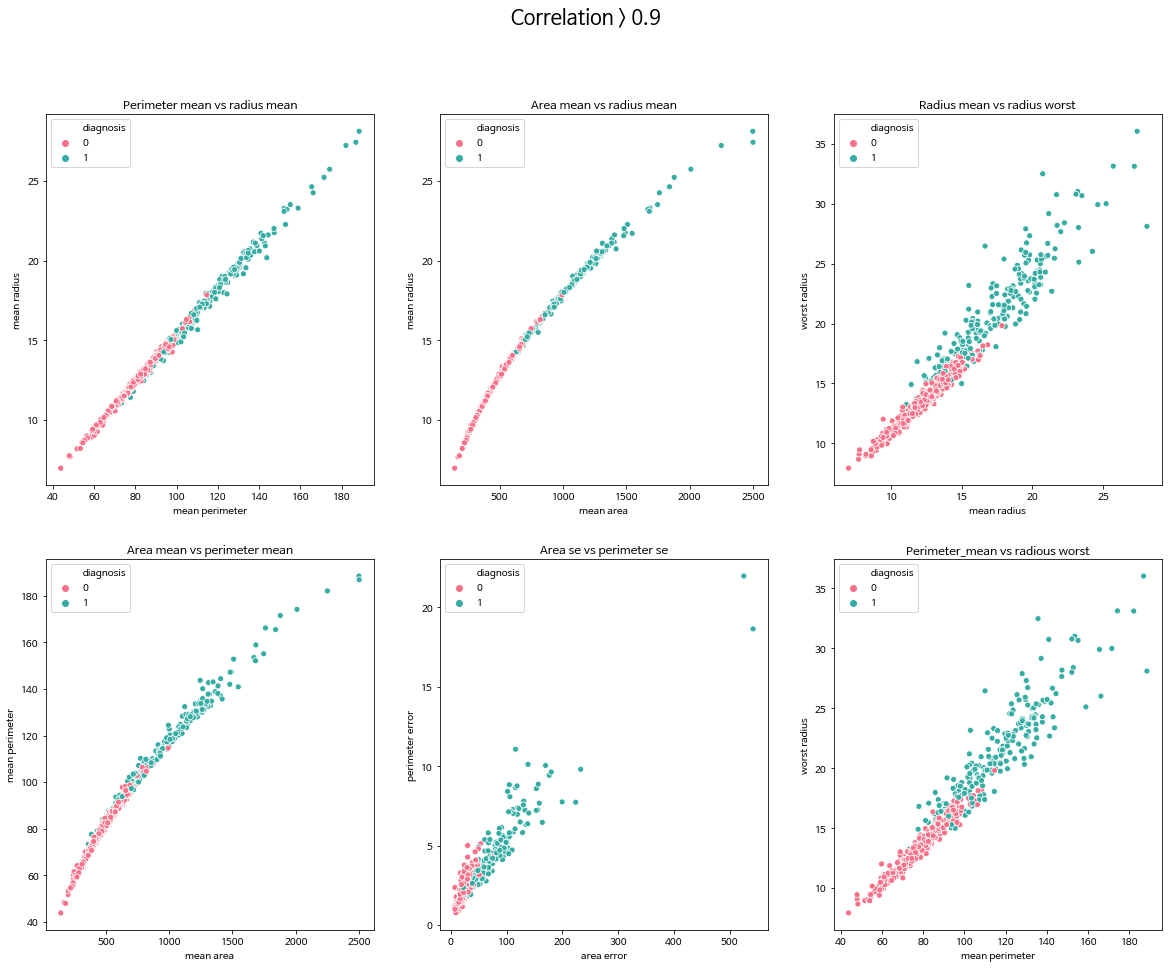

In [12]:
fig = plt.figure(figsize = (20,15))
plt.subplot(231)
sns.scatterplot(x = data['mean perimeter'], y = data['mean radius'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Perimeter mean vs radius mean')
plt.subplot(232)
sns.scatterplot(x = data['mean area'], y = data['mean radius'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Area mean vs radius mean')
plt.subplot(233)
sns.scatterplot(x = data['mean radius'], y = data['worst radius'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Radius mean vs radius worst')
plt.subplot(234)
sns.scatterplot(x = data['mean area'], y = data['mean perimeter'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Area mean vs perimeter mean')
plt.subplot(235)
sns.scatterplot(x = data['area error'], y = data['perimeter error'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Area se vs perimeter se')
plt.subplot(236)
sns.scatterplot(x = data['mean perimeter'], y = data['worst radius'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Perimeter_mean vs radious worst')
fig.suptitle('Correlation > 0.9', fontsize = 20)

# 2.4.1.2 scatter plot 0.5 < correlation < 0.9 
mean concavity - worst concavity<br>
mean concavity - worst concave points<br>
mean area - mean concave points<br>
mean area - radius error<br>
mean compactness - mean symmetry<br>
mean area - mean compactness<br>
**다음과 같은 variable간에 correlation이 0.5 < correlation < 0.9가 나타났다.<br>
또한 그래프를 살펴보면 linear느낌으로 그래프가 흩날려서 찍히는 것을 확인했다.**<br>
**따라서 약간의 선형관계가 있는 것으로 보인다.**<br>

Text(0.5, 0.98, '0.5 < correlation < 0.9')

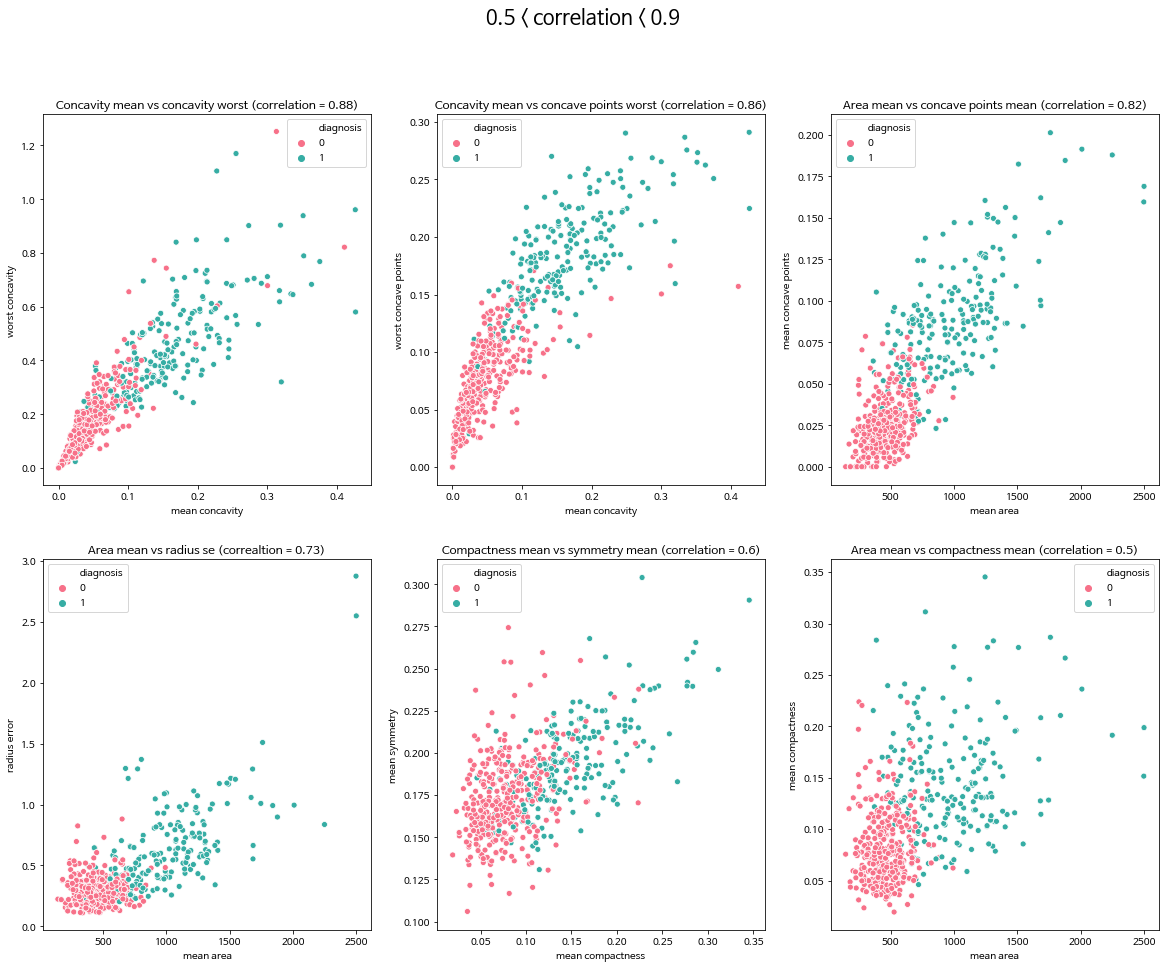

In [13]:
fig = plt.figure(figsize = (20,15))
plt.subplot(231)
sns.scatterplot(x = data['mean concavity'], y = data['worst concavity'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Concavity mean vs concavity worst (correlation = 0.88)')
plt.subplot(232)
sns.scatterplot(x = data['mean concavity'], y = data['worst concave points'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Concavity mean vs concave points worst (correlation = 0.86)')
plt.subplot(233)
sns.scatterplot(x = data['mean area'], y = data['mean concave points'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Area mean vs concave points mean (correlation = 0.82)')
plt.subplot(234)
sns.scatterplot(x = data['mean area'], y = data['radius error'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Area mean vs radius se (correaltion = 0.73)')
plt.subplot(235)
sns.scatterplot(x = data['mean compactness'], y = data['mean symmetry'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Compactness mean vs symmetry mean (correlation = 0.6)')
plt.subplot(236)
sns.scatterplot(x = data['mean area'], y = data['mean compactness'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Area mean vs compactness mean (correlation = 0.5)')
fig.suptitle('0.5 < correlation < 0.9', fontsize = 20)

# 2.4.1.3 scatter plot correlation < 0.5
mean area - mean texture<br>
mean area - compactness error<br>
concavity error - worst texture<br>
mean radius - worst fractal dimension<br>
**다음과 같은 variable간에 correlation이 correlation < 0.5가 나타났다.**<br>
**또한 그래프를 살펴보면 그래프가 흩날려서 찍히는 것을 확인해 두 variable간의 상관관계가 없는 것 같다고 예측할 수 있다.**

Text(0.5, 0.98, 'correlation < 0.5')

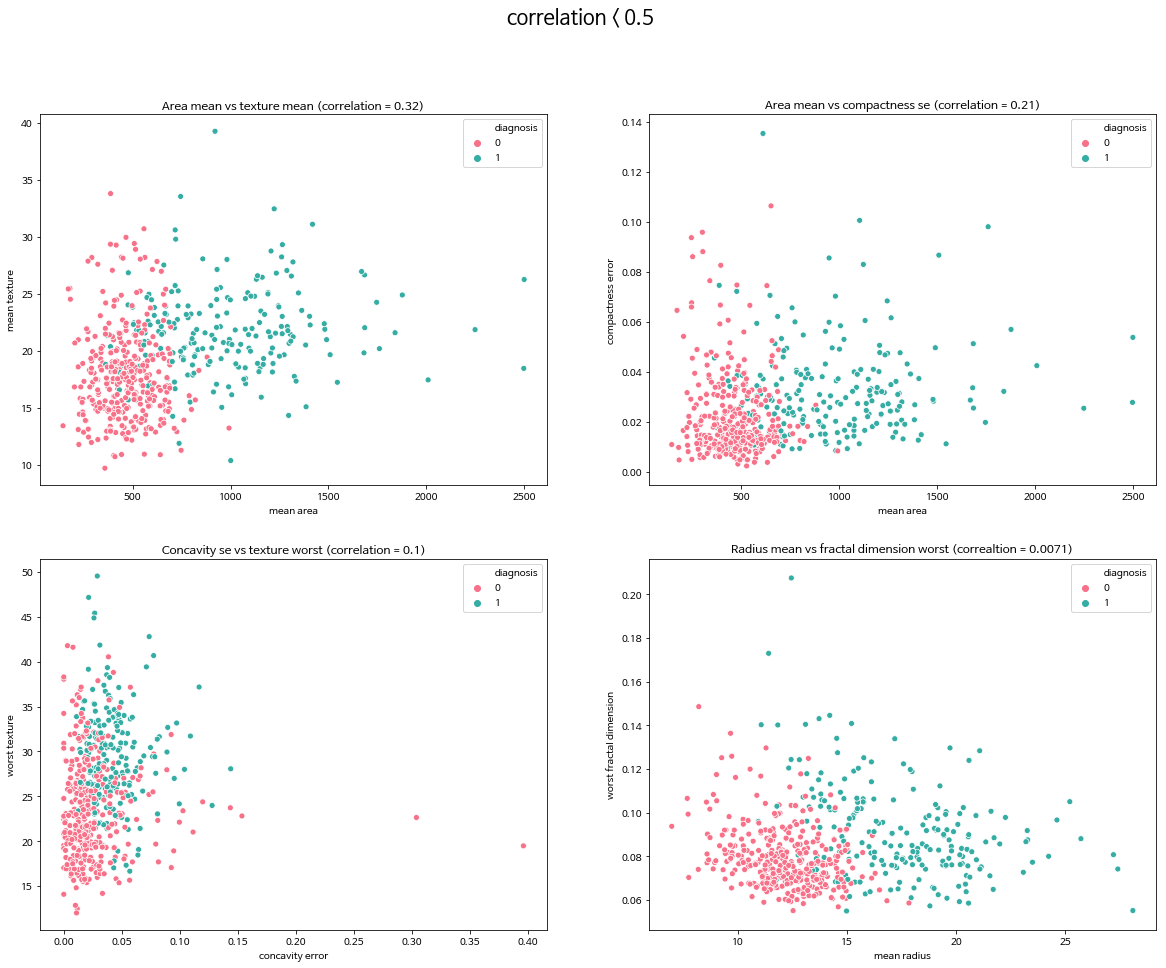

In [14]:
fig = plt.figure(figsize = (20,15))
plt.subplot(221)
sns.scatterplot(x = data['mean area'], y = data['mean texture'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Area mean vs texture mean (correlation = 0.32)')
plt.subplot(222)
sns.scatterplot(x = data['mean area'], y = data['compactness error'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Area mean vs compactness se (correlation = 0.21)')
plt.subplot(223)
sns.scatterplot(x = data['concavity error'], y = data['worst texture'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Concavity se vs texture worst (correlation = 0.1)')
plt.subplot(224)
sns.scatterplot(x = data['mean radius'], y = data['worst fractal dimension'], hue = "diagnosis", data = data, palette = "husl")
plt.title('Radius mean vs fractal dimension worst (correaltion = 0.0071)')
fig.suptitle('correlation < 0.5', fontsize = 20)